In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df_train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [56]:
# Combine training and test datasets so we don't need to repeat steps when testing our prediction model
df_train['source'] = 'train'
df_test['source'] = 'test'
df = pd.concat([df_train, df_test], ignore_index = True)

In [57]:
df_train.shape, df_test.shape, df.shape

((8523, 13), (5681, 12), (14204, 13))

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

# Observations
Categorical Variables:
    
Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type

Continuous Variables:
    
Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Outlet_Sales

Variables with missing values:
    
Item_Weight: missing 
Outlet_Size: missing

In [59]:
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

# Observations

--The above output shows there are 1559 unique products

--5 unique types of Fat contents

--16 unique Item types

--10 unique outlets


# Data Exploration and Data Cleaning

In [64]:
df.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

<AxesSubplot:>

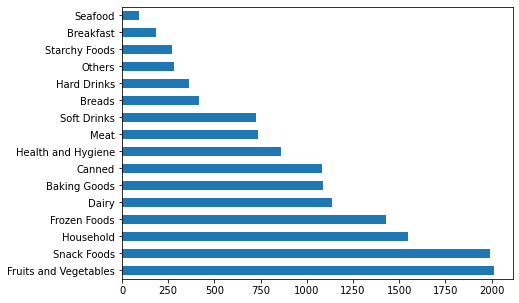

In [66]:
fig, ax = plt.subplots(figsize = (7,5))
df['Item_Type'].value_counts().plot(ax = ax, kind = 'barh')

In [67]:
#we've identified the relationship between the Item_Identifer and Item_Type, we could use this to re-categorize the types

In [70]:
# Recategorizing Item_Types
df['Item_Type_cat'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type_cat'] = df['Item_Type_cat'].replace(['FD','DR','NC'],['Food','Drinks','Non-Consumable'])
df.Item_Type_cat.value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_cat, dtype: int64

<AxesSubplot:>

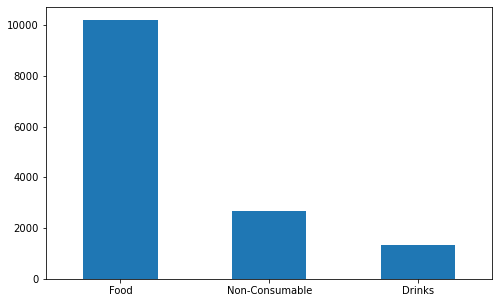

In [73]:
fig, ax = plt.subplots(figsize = (8,5))
df['Item_Type_cat'].value_counts().plot(ax = ax, kind = 'bar', rot = 0)

In [74]:
#Frequency table of Item_Fat_Content
df.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:>

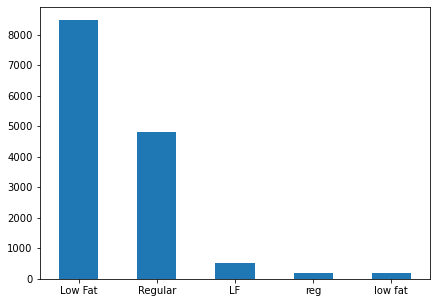

In [75]:
fig, ax = plt.subplots(figsize = (7,5))
df['Item_Fat_Content'].value_counts().plot(ax = ax, kind = 'bar', rot = 0)

In [80]:
# cleaning up the Item_Fat_Contents
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'],'Regular')
df.loc[df['Item_Type_cat']=='Non-Consumable','Item_Fat_Content'] = 'Non-Consumable'
df.Item_Fat_Content.value_counts()

Low Fat           6499
Regular           5019
Non-Consumable    2686
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:>

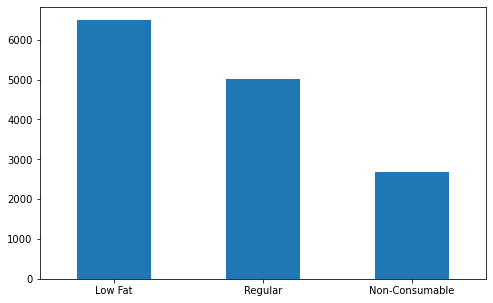

In [83]:
fig, ax = plt.subplots(figsize = (8,5))
df['Item_Fat_Content'].value_counts().plot(ax = ax, kind = 'bar', rot = 0)

In [86]:
#Frequency table of Outlet_Location_Type
df.Outlet_Location_Type.value_counts().sort_index()

Tier 1    3980
Tier 2    4641
Tier 3    5583
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:>

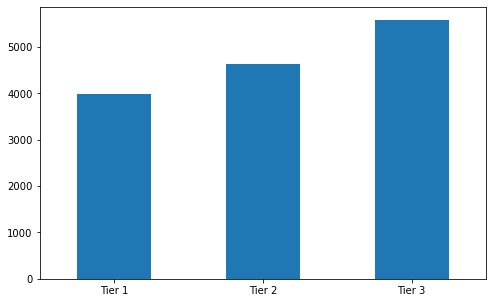

In [88]:
fig, ax = plt.subplots(figsize = (8,5))
df['Outlet_Location_Type'].value_counts().sort_index().plot(ax = ax, kind = 'bar', rot = 0)

In [89]:
# frequency table of Outlet_Type
df.Outlet_Type.value_counts().sort_index()

Grocery Store        1805
Supermarket Type1    9294
Supermarket Type2    1546
Supermarket Type3    1559
Name: Outlet_Type, dtype: int64

<AxesSubplot:ylabel='Outlet_Type'>

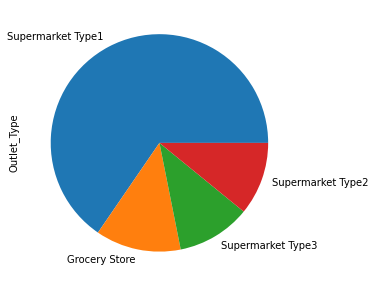

In [90]:
fig, ax = plt.subplots(figsize = (8,5))
df['Outlet_Type'].value_counts().plot(ax = ax, kind = 'pie')

In [91]:
# frequency table of Outlet_Size
# expected missing values here
df.Outlet_Size.value_counts().sort_index()

High      1553
Medium    4655
Small     3980
Name: Outlet_Size, dtype: int64

<AxesSubplot:>

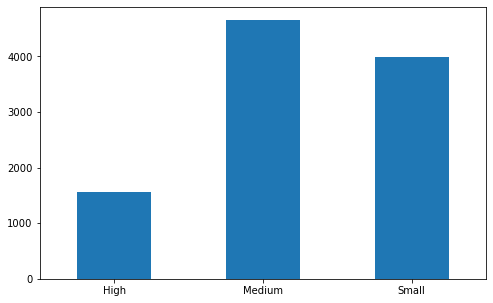

In [92]:
fig, ax = plt.subplots(figsize = (8,5))
df['Outlet_Size'].value_counts().sort_index().plot(ax = ax, kind = 'bar', rot = 0)
# notice there are relatively more Medium Outlet size compared to other sizes

In [104]:
# print out the total number of missing value before imputation
sum(df['Outlet_Size'].isnull())

4016

In [105]:
imr = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imr = imr.fit(df[['Outlet_Size']])
df['Outlet_Size'] = imr.transform(df[['Outlet_Size']]).ravel()

# print total number of missing values after imputation
sum(df['Outlet_Size'].isnull())

0

In [106]:
df.Outlet_Size.value_counts().sort_index()

High      1553
Medium    8671
Small     3980
Name: Outlet_Size, dtype: int64

In [107]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


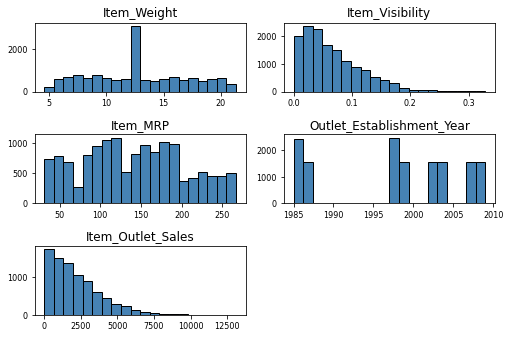

In [113]:
df.hist(bins = 20, color = 'steelblue', edgecolor = 'black', linewidth = 1.0,
       xlabelsize = 8, ylabelsize = 8, grid = False)
plt.tight_layout(rect = (0,0,1.2,1.2))


In [116]:
#Imputation on Item_Weight
imr_wt = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imr_wt = imr_wt.fit(df[['Item_Weight']])
df['Item_Weight'] = imr_wt.transform(df[['Item_Weight']]).ravel()

# print total number of missing values after imputation
sum(df['Item_Weight'].isnull())



0

C:\Users\yoges\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


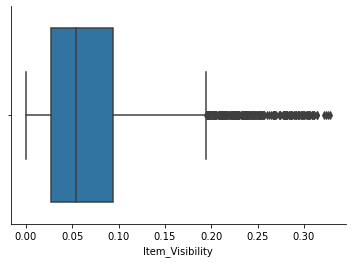

In [117]:
#Item_Visibility
# indeed there exists quite a few outliers in variable Item_Visibility
sns.boxplot(df['Item_Visibility'])
sns.despine()

In [119]:
np.sum([df['Item_Visibility'] == 0])

879

In [123]:
imr_vs = SimpleImputer(missing_values = 0, strategy = 'mean')
imr_vs = imr_vs.fit(df[['Item_Visibility']])
df['Item_Visibility'] = imr_vs.transform(df[['Item_Visibility']]).ravel()

# print total number of missing values after imputation
np.sum([df['Item_Visibility'] == 0])

0

C:\Users\yoges\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


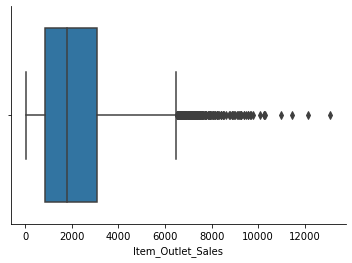

In [125]:
#Item_Outlet_Sales
sns.boxplot(df['Item_Outlet_Sales'])
sns.despine()

C:\Users\yoges\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

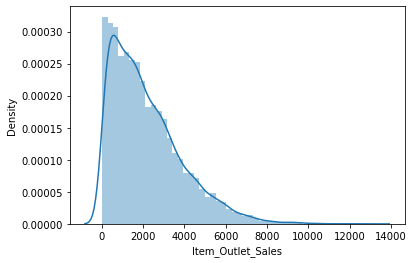

In [126]:
sns.distplot(df['Item_Outlet_Sales'])
# we dont perform any outlier treatment on target variable on this project

# Bivariate Analysis

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

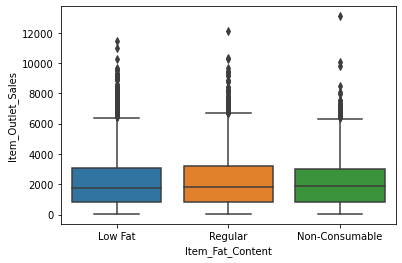

In [127]:
sns.boxplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = df)

<AxesSubplot:xlabel='Item_Type_cat', ylabel='Item_Outlet_Sales'>

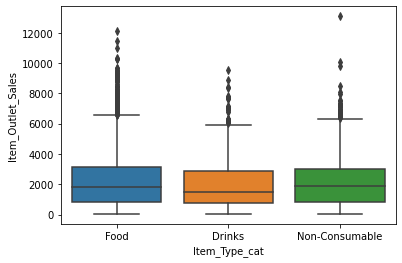

In [128]:
# since we already grouped items into 3 categories
sns.boxplot(x = 'Item_Type_cat', y = 'Item_Outlet_Sales', data = df)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

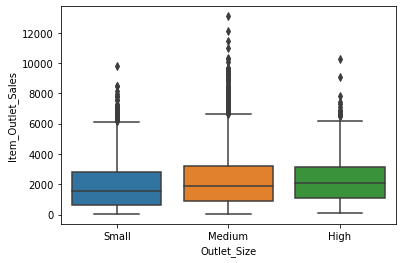

In [129]:
sns.boxplot(x = 'Outlet_Size', y = 'Item_Outlet_Sales', data = df,
           order =['Small','Medium','High'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

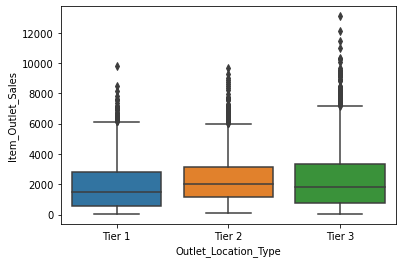

In [130]:
sns.boxplot(x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales',data = df,
           order =['Tier 1','Tier 2','Tier 3'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

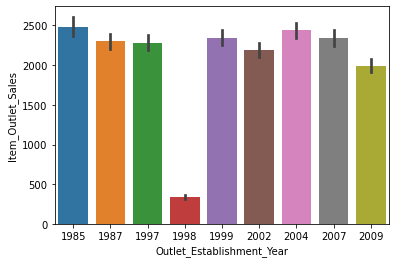

In [131]:
sns.barplot(x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', data = df)
# we should transform 'Outlet_Establishment_Year' variable so we can get more insights

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

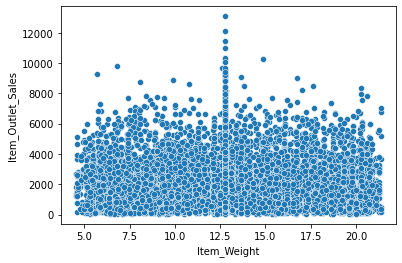

In [132]:
sns.scatterplot(x = 'Item_Weight', y = 'Item_Outlet_Sales', data = df)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

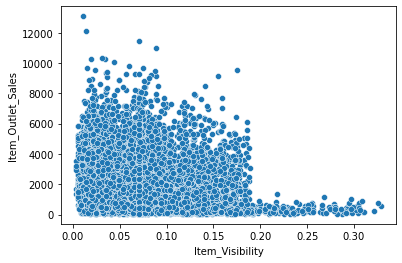

In [133]:
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales',data = df)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

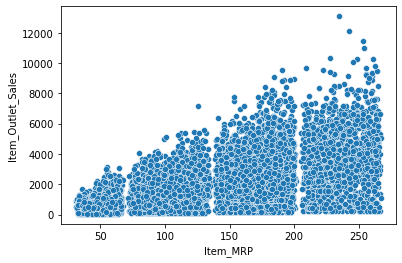

In [134]:
sns.scatterplot(x = 'Item_MRP', y = 'Item_Outlet_Sales', data = df)

In [144]:
#one-hot encoding
code_numeric = {'Low Fat': 1, 'Regular':2, 'Non-Consumable':3,
                'Food':1, 'Drinks': 2, 'Non-Consumable':3,
                'Small':1,'Medium':2,'High':3,
                'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3, 'Grocery Store':4,
                'Tier 1':1, 'Tier 2':2, 'Tier 3':3
               }
df = df.applymap(lambda i: code_numeric.get(i) if i in code_numeric else i)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
 13  Item_Type_cat              14204 non-null  int

In [145]:
# transforming establishment year 
df['Outlet_Establishment_Year'] = 2013-df['Outlet_Establishment_Year']
df['Outlet_Establishment_Year'].value_counts()

28    2439
26    1553
14    1550
16    1550
9     1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Establishment_Year, dtype: int64

# Exporting datasets

In [146]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_cat
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,14,2,1,1,3735.1380,train,1
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,4,2,3,2,443.4228,train,2
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,14,2,1,1,2097.2700,train,1
3,FDX07,19.20,2,0.070303,Fruits and Vegetables,182.0950,OUT010,15,2,3,4,732.3800,train,1
4,NCD19,8.93,3,0.070303,Household,53.8614,OUT013,26,3,3,1,994.7052,train,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,2,0.013496,Snack Foods,141.3154,OUT046,16,1,1,1,NaN,test,1
14200,FDD47,7.60,2,0.142991,Starchy Foods,169.1448,OUT018,4,2,3,2,NaN,test,1
14201,NCO17,10.00,3,0.073529,Health and Hygiene,118.7440,OUT045,11,2,2,1,NaN,test,3
14202,FDJ26,15.30,2,0.070303,Canned,214.6218,OUT017,6,2,2,1,NaN,test,1


In [147]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source', 'Item_Type_cat'],
      dtype='object')

In [148]:
IDcols = ['Item_Identifier', 'Outlet_Identifier']
ids = df_test[IDcols]
ids

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [152]:
pd.set_option('mode.chained_assignment',None)
df.drop(['Item_Type'], axis = 1, inplace = True)
df.drop(IDcols, axis = 1, inplace = True)

df_train = df.loc[df['source'] == 'train']
df_test = df.loc[df['source'] == 'test']
df_train.drop(['source'], axis = 1, inplace = True)
df_test.drop(['source'], axis = 1, inplace = True)

KeyError: "['Item_Type'] not found in axis"

In [153]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_cat
0,9.30,1,0.016047,249.8092,14,2,1,1,3735.1380,1
1,5.92,2,0.019278,48.2692,4,2,3,2,443.4228,2
2,17.50,1,0.016760,141.6180,14,2,1,1,2097.2700,1
3,19.20,2,0.070303,182.0950,15,2,3,4,732.3800,1
4,8.93,3,0.070303,53.8614,26,3,3,1,994.7052,3


# Variable Correlations

<AxesSubplot:>

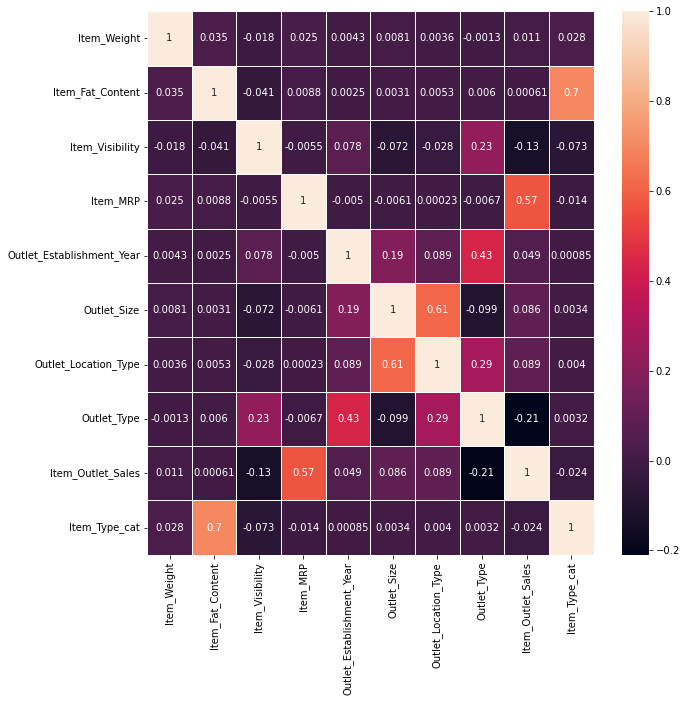

In [154]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_train.corr(), annot = True, linewidths = .5, ax = ax)

# Linear Regression

In [155]:
# defining relevant variables
y_train = df_train['Item_Outlet_Sales']
y_test = df_test['Item_Outlet_Sales']

X_train = df_train.drop(['Item_Outlet_Sales'], axis = 1)
X_test = df_test.drop(['Item_Outlet_Sales'], axis = 1)

In [156]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize = True)
model.fit(X_train, y_train)
model.intercept_, model.coef_
y_predict = model.predict(X_test)
y_predict

array([1412.99658034, 1311.07132568, 2641.21370853, ..., 1862.95575275,
       3195.19446469, 1288.25108081])

# Sales Prediction

In [157]:
ids['Item_Outlet_Sales'] = y_predict
prediction = pd.DataFrame(ids)
prediction.to_csv('submission.csv', index = False)
prediction

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1412.996580
1,FDW14,OUT017,1311.071326
2,NCN55,OUT010,2641.213709
3,FDQ58,OUT017,2377.367238
4,FDY38,OUT027,3831.932165
...,...,...,...
5676,FDB58,OUT046,2577.033091
5677,FDD47,OUT018,2242.118587
5678,NCO17,OUT045,1862.955753
5679,FDJ26,OUT017,3195.194465
